# OCAMI Algebra Seminar Demonstration

In [4]:
load("tors_lattice.py")

## Input your poset of torsion classes!

Construct your poset and name your poset `poset`.

Input using SageMath's `Poset` function.

In [5]:
poset = Poset( ([1,2,3,4,5], [[1,2], [2,5], [1,3],[3,4],[4,5]] ) )

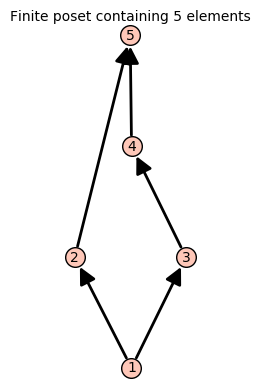

In [6]:
poset

### Important remark
The directions of Hasse arrows in SageMath is **opposite** to our convention!

Input using Jan Geuenich's [String Applet](https://www.math.uni-bielefeld.de/~jgeuenich/string-applet/) and my [String Applet to Sage converter](https://github.com/haruhisa-enomoto/StringApplet-to-SageMath-converter)

In [7]:
load("converter.py")

In [9]:
poset = Poset( SAtoSage("data.tex"))

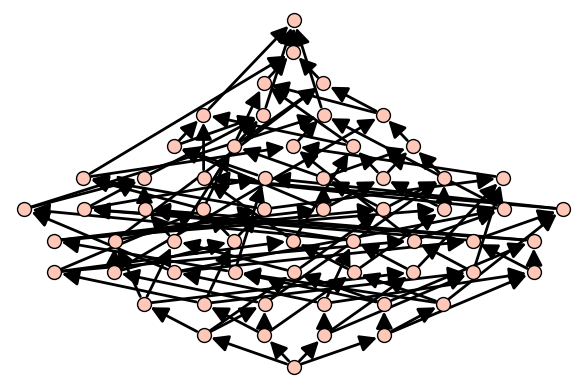

In [10]:
myshow(poset, label = False)

## Enjoy!

Construct the lattice of torsion classes by `TorsLattice(poset)`

In [11]:
tors = TorsLattice(poset)

The lattice of wide subcats: `tors.wide_lattice()`

In [12]:
wide = tors.wide_lattice()

In [13]:
wide

Finite lattice containing 60 elements (use the .plot() method to plot)

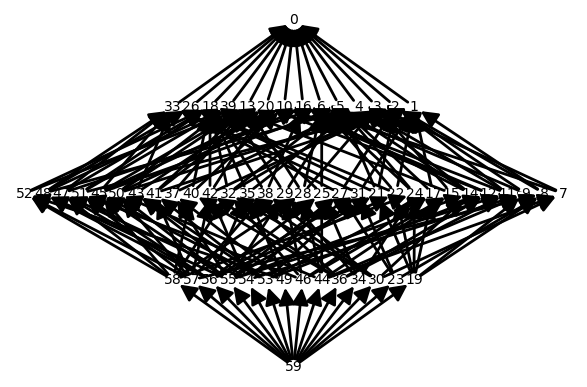

In [14]:
myshow(wide)

The lattice of ICE-closed subcats: `tors.ice_lattice()`

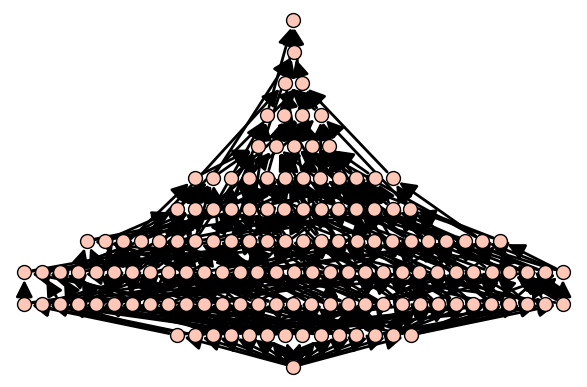

In [16]:
myshow(tors.ice_lattice(), label = False)

The poset of torsion hearts: `tors.heart_poset()`

In [17]:
heart = tors.heart_poset()

In [18]:
heart.is_lattice()

False

$\Delta(\Lambda)$: `tors.s_tau_tilt_complex()`

In [19]:
cpx = tors.s_tau_tilt_complex()

In [21]:
cpx.h_vector()

[1, 14, 30, 14, 1]

## Path algebra

$\mathsf{tors} kQ$ for a Dynkin quiver $Q$ is given by the Cambiran lattice [Ingalls-Thomas].

Consider the path algebra $k [ 1 \to 2 \leftarrow 3]$, type $A_3$ with its source sequence $(1,3,2)$.

Name `W = WeylGroup(["A3"])`, and  $\mathsf{tors} kQ$ is `W.cambrian_lattice((1,3,2))`.

In [22]:
W = WeylGroup(["A3"])

In [23]:
poset = W.cambrian_lattice((1,3,2))

In [25]:
tors = TorsLattice(poset)

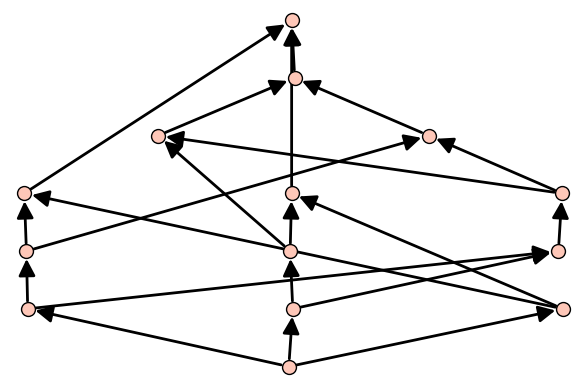

In [26]:
myshow(tors, label = False)

$\mathsf{wide} kQ$ should be isomorphic to the so-called **non-crossing partition lattice**, given by `posets.NoncrossingPartitions(W)`.

In [27]:
wide = tors.wide_lattice()

In [28]:
NC = posets.NoncrossingPartitions(W)

In [29]:
wide.is_isomorphic(NC)

True

$\Delta(kQ)$ should be isomorphic to `ClusterComplex(["A3"])`.

In [30]:
cpx = tors.s_tau_tilt_complex()

In [31]:
cpx.is_isomorphic(ClusterComplex(["A3"]))

True

## Preprojective algebra

$\mathsf{tors} \Pi$ is given by the right weak order of the Weyl group [Mizuno].

Consider the preprojective algebra of $\Pi$ type $D_4$.

Let's google how to input this!

In [32]:
W = CoxeterGroup(["D4"])

In [33]:
poset = W.weak_poset()
tors = TorsLattice(poset)

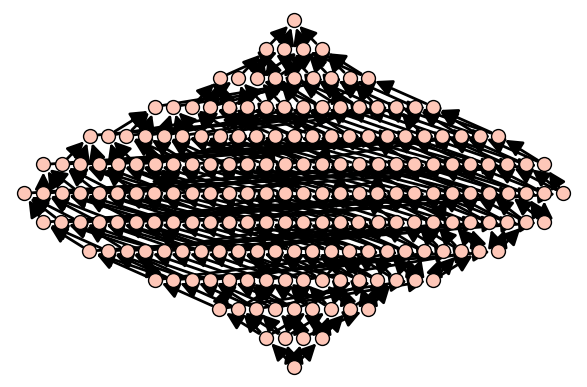

In [34]:
myshow(tors, label = False)

Compare $\mathsf{wide} \Pi$ and shard intersection order, given by `W.shard_poset()`

In [35]:
tors.wide_lattice().is_isomorphic(W.shard_poset())

True

Guess what $\Delta(\Pi)$ is.

Hint: compute invariants like the f-vector, and search it in [OEIS](https://oeis.org/).

In [36]:
cpx = tors.s_tau_tilt_complex()

In [38]:
cpx.f_vector()

[1, 48, 240, 384, 192]

In [39]:
W.permutahedron().polar().boundary_complex().is_isomorphic(cpx)

True

## Lattice property for wide subcategories

Let's see what kind of properties the lattice of wide subcategories has.

In [40]:
wide.is_ranked()

True

In [41]:
wide.is_semidistributive()

False

In [42]:
wide.is_complemented()

True

In [43]:
wide.is_relatively_complemented()

True

In [44]:
wide.is_sperner()

True

In [45]:
wide.is_eulerian()

False

## Counterexample for Sakai's conjecture

**Conjecture.** The number of Hasse arrows in the poset of ICE-closed subcats is equal to the number of indecomposable Ext-projective objects!

Suppose you have `tors`. Then the next code check this conjecture.

In [46]:
ice = tors.ice_lattice()
ice_itv = {itv for itv in tors.all_itvs() if tors.is_ice_itv(itv)} # the set of all ICE intervals

for itv in ice_itv: 
    num_proj = tors.number_of_projs(itv)
    itv_brick = tors.bricks(itv) 
    num_Hasse_arrows = len(ice.lower_covers(itv_brick))
    if num_proj != num_Hasse_arrows:
        print ("Not True!!")
        break
else:
    print("The conjecture is True in this case.")

Not True!!
